# Project 2 - Investigate a dataset

### Questions

For this project I chose the Titanic dataset. Because the famous Titanic crash generated a number of ideas that are now taken for granted, I liked the oppportunity given by this dataset. Let's see if some of these ideas are confirmed also by numbers. I would like to investigate the answers to the following questions:
- are the titles of the passengers correlated to their age?
- are the prices of tickets correlated to class?
- were women and children given priority to the lifeboats?

In [1]:
# preliminaries
%matplotlib inline

# load needed modules
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import matplotlib.patches as mptch

### Data Exploration and Wrangling

Let's have a look at the data and perform some basic transformations:

In [2]:
# load the data
mydata = pd.read_csv('titanic_data.csv')
print mydata.head()
print 'Data frame dimensions:', mydata.shape

print ''
print 'Check if all entries for the field "Survived" are filled in:', np.unique(mydata['Survived'])
print 'Check if all entries for the field "Pclass" are filled in:', np.unique(mydata['Pclass'])
print 'Check if all entries for the field "Sex" are filled in:', np.unique(mydata['Sex'])
print 'Check how many empty data fields are in "Fare":', mydata['Fare'].isnull().sum(), '/', mydata.shape[0] 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Data fra

The data consists of 12 variables and 891 data rows. The full description of each column is given on the kaggle.com website. For this project I will focus mainly on the columns 'Survived', 'Pclass', 'Name', 'Sex', 'Age' and 'Fare'.

Next, I will perform some transformations on the data set:
- the previous cell confirms that the entries for "Survived" are in the form of an integer (0 or 1). I will change it to a boolean value
- the 'Sex' column contains strings (male, female). It will be easier to convert them to a boolean value (true if passenger is female) and change the name of the column into 'IsFemale' to reflect that
- passenger class is given in the form of an integer (1,2,3) - no transformations will be performed
- the fare is given as a float - no transformations will be performed
- drop all the unused columns

In [3]:
# transform 'Survived' into a boolean
mydata['Survived'] = mydata['Survived'] == 1

# transform the 'Sex' into a boolean, 'true' if female
mydata['Sex'] = mydata['Sex'] == 'female'
# rename the column to 'IsFemale'
mydata.rename(columns = {'Sex': 'IsFemale'}, inplace=True)

# drop the unneeded columns
mydata.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

print mydata.head()

  Survived  Pclass                                               Name  \
0    False       3                            Braund, Mr. Owen Harris   
1     True       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2     True       3                             Heikkinen, Miss. Laina   
3     True       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4    False       3                           Allen, Mr. William Henry   

  IsFemale  Age     Fare  
0    False   22   7.2500  
1     True   38  71.2833  
2     True   26   7.9250  
3     True   35  53.1000  
4    False   35   8.0500  


### Investigating the Age-Title Relationship

In [4]:
# print some age values
print 'A few age values:', mydata['Age'].as_matrix()[800:850]
print ''
print 'Check how many empty data fields are in "Age":', mydata['Age'].isnull().sum(), '/', mydata.shape[0]

A few age values: [ 34.    31.    11.     0.42  27.    31.    39.    18.    39.    33.    26.
  39.    35.     6.    30.5     nan  23.    31.    43.    10.    52.    27.
  38.    27.     2.      nan    nan   1.      nan  62.    15.     0.83
    nan  23.    18.    39.    21.      nan  32.      nan  20.    16.    30.
  34.5   17.    42.      nan  35.    28.      nan]

Check how many empty data fields are in "Age": 177 / 891


The last step of the data wrangling concerns the age variable. The kaggle.com documentation states that a 'nan' value is inserted if the age information is unavailable. If the passenger is a child less than one-year-old, the age is introduced as a float number between (0,1). If the age is estimated, then the age is a float in the form 'x.5' or 'xx.5'. The values printed above confirm this. Notice also that 177 out of 891 samples are missing for the age column.

On kaggle.com forum, one user suggested that the title of the person might be used to infer the age. This is an interesting idea! I performed this in several steps:

First, the format of the name seems to be "x...x x..x, Title. x...x". I extract the title using string searches for the start of the title (characters ', ') and end of the title (characters '. '). The name column will be replaced by the 'Title' column and I will print how many records are missing in each title category:

In [5]:
# define a mapping function that extracts the title from the name string
import string
def getTitle(s):
    p1 = string.find(s, ', ')
    p2 = string.find(s, '. ')
    return s[p1+2:p2]

# add a column with this info and remove the name column
mydata['Title'] = mydata['Name'].map(getTitle)
mydata.drop(['Name'], axis=1, inplace=True)

# print unique titles
print 'Unique titles:', mydata['Title'].unique()

# figure out how many records are missing in each category
for v,g in mydata[['Age', 'Title']].groupby('Title'):
    missing = g['Age'].isnull().sum()
    if missing != 0:
        print 'Title:', v, '\tmissing values:', missing, '/', g.shape[0]

Unique titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Title: Dr 	missing values: 1 / 7
Title: Master 	missing values: 4 / 40
Title: Miss 	missing values: 36 / 182
Title: Mr 	missing values: 119 / 517
Title: Mrs 	missing values: 17 / 125


Next, I plot the boxplots of the distributions of age for each title where we have at least a missing entry:

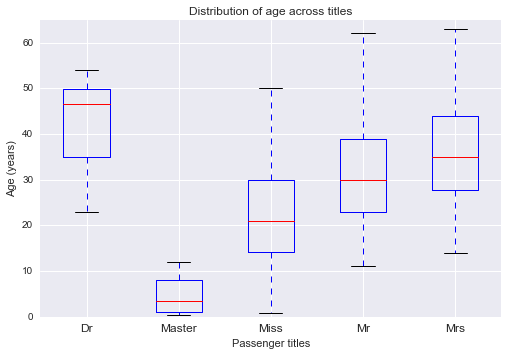

In [6]:
# plot the boxplots for the titles Miss, Mr, Mrs
tempdata = mydata[['Age', 'Title']].dropna()
tempdata = tempdata[tempdata['Title'].isin(['Miss', 'Mr', 'Mrs', 'Master', 'Dr'])]
tempdata.boxplot(column=['Age'], by=['Title'])

plt.title('Distribution of age across titles')
plt.suptitle("")
plt.xlabel('Passenger titles')
plt.ylabel('Age (years)')
bogus = plt.ylim(ymax = 65)

The boxplots above reveal that there exists indeed correlation between the titles and ages. As intuition also dictates, the title "Dr." is correlated with mature persons, the title "Master." is used for children while "Mister." for adult males. The median values for "Miss." and "Mrs." show a clear distinction in age for married and single women. 

This last statement is confirmed using hypothesis testing. Our hypothesis can be:

H0: mu_miss = mu_mrs

H1: mu_miss < mu_mrs

where mu_miss and mu_mrs are the population means for the "miss" and "mrs" classes. Assuming the means of the samples normally distributed and independence between the samples, we can perform an independent one-tailed t-test. The numerical values are as follows:

In [7]:
# extract the two data samples
datamiss = tempdata[tempdata['Title'].isin(['Miss'])]['Age']
datamrs = tempdata[tempdata['Title'].isin(['Mrs'])]['Age']

# compute the sample means
m_miss = datamiss.mean()
m_mrs = datamrs.mean()
print "Mean values for samples:", m_miss, m_mrs

# compute the sample variances
v_miss = datamiss.var()
v_mrs = datamrs.var()
print "Variances for samples:", v_miss, v_mrs

# compute the pooled variance
var_pooled = (v_miss*(len(datamiss)-1) + v_mrs*(len(datamrs)-1))/(len(datamiss) + len(datamrs) - 2)
print "Pooled variance:", var_pooled

# compute the standard error
from math import sqrt
s_err = sqrt(var_pooled/len(datamiss) + var_pooled/len(datamrs))
print "Standard error:", s_err

# compute the t-statistic
tstat = (m_miss-m_mrs) / s_err
print "t-statistic:", tstat

Mean values for samples: 21.7739726027 35.8981481481
Variances for samples: 168.747697213 130.727847006
Pooled variance: 152.604348117
Standard error: 1.5678770629
t-statistic: -9.00847131422


The t-statistic is so large that I have to reject the null hypothesis for any reasonable confidence level (say 0.01% to 5%). The probability that the two samples come from the same distribution is smaller than 0.00001. This answers one of the questions we asked in this project.

For the next step of data wrangling I will replace the 'nan' values for the age of people in the five groups above with the median value for each category. This will lead to slightly different results than dropping all the unavailable data and is just a choice.

In [8]:
# replace the 'nan' values with median values for the categories we selected above
titles = ('Miss', 'Mr', 'Mrs', 'Master', 'Dr')
for v in titles:
    index = mydata['Title'].isin([v])
    median = mydata[index]['Age'].median()
    mydata.loc[index, ('Age')] = mydata.loc[index, ('Age')].fillna(mydata[index]['Age'].median())

# print the header of the no-nan data
print mydata.head()

  Survived  Pclass IsFemale  Age     Fare Title
0    False       3    False   22   7.2500    Mr
1     True       1     True   38  71.2833   Mrs
2     True       3     True   26   7.9250  Miss
3     True       1     True   35  53.1000   Mrs
4    False       3    False   35   8.0500    Mr


### Investigating Price/Class Relationships

There are two variables that distinguish classes: the class variable and the ticket price.

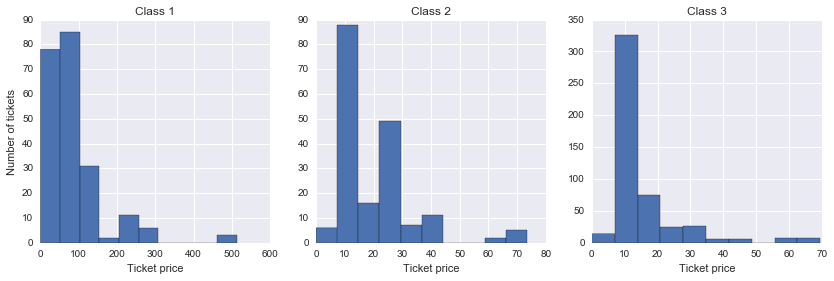

In [9]:
# plot histograms of prices per class
plt.figure(figsize=(14, 4))

for c in (1,2,3):
    plt.subplot(1,3,c)
    mydata[mydata['Pclass'].isin([c])]['Fare'].hist()
    plt.xlabel('Ticket price')
    plt.title('Class ' + str(c))

# add a y label
plt.subplot(1,3,1)
bogus = plt.ylabel('Number of tickets')

The intuition that each class has a different price range is confirmed by the data in the graphic above. There is a bit of overlapping between the classes which can be caused by two causes:
- various types of price variation due to discounts, date/place of purchasing of the ticket, etc.
- no data available - filled with a default value

By visual inspection, it turns out that there are quite a number of '0' values, probably filled in if no information was available. I filter them out and re-plot the data:

class 1 median ticket price: 61.9792
class 2 median ticket price: 15.0229
class 3 median ticket price: 8.05


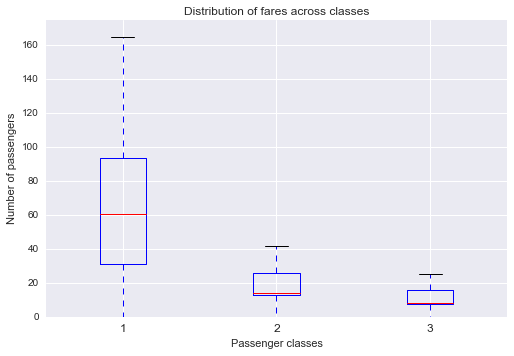

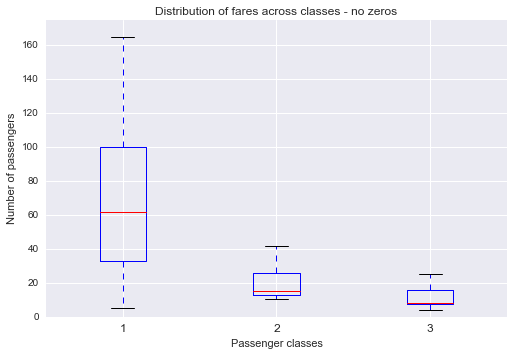

In [10]:
# show relationship between fare and class
def plotFareClassRelationship(data, title):
    data.boxplot(column=['Fare'], by=['Pclass'])
    plt.title(title)
    plt.suptitle("")
    plt.xlabel('Passenger classes')
    plt.ylabel('Number of passengers')
    plt.ylim(ymax = 175)

# plot the data without removing the 0 values    
plotFareClassRelationship(mydata, 'Distribution of fares across classes')

# plot the data after values '0' were removed
mydata_nozeroprices = mydata[mydata['Fare']!=0]
plotFareClassRelationship(mydata_nozeroprices, 'Distribution of fares across classes - no zeros')

# print median values for the tickets
for v, g in mydata_nozeroprices.groupby('Pclass'):
    print "class", v, 'median ticket price:', g['Fare'].median()

Furthermore, by sorting the prices values for class 1, an outlier with value '5' stands out. Apart from it, the rest of the 'Fare' data looks ok.

In [11]:
price_class1 = mydata_nozeroprices[mydata_nozeroprices['Pclass'].isin([1])]['Fare']
print np.sort(price_class1.as_matrix())[0:20]

[  5.      25.5875  25.925   25.9292  25.9292  26.      26.      26.2833
  26.2875  26.2875  26.2875  26.3875  26.55    26.55    26.55    26.55
  26.55    26.55    26.55    26.55  ]


### Investigating Sex Relationship to Survival Rate

I start by taking a look at the ratio females/males:

total passengers: 891
Male 	577 / 891 ratio 0.64758698092
Female 	314 / 891 ratio 0.35241301908


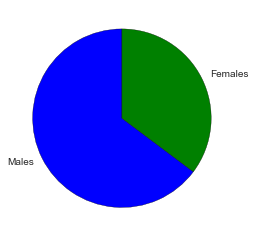

In [13]:
# how many women and men?
print 'total passengers:', mydata.shape[0]

vals = list()
for v,g in mydata.groupby('IsFemale'):
    sex = 'Female' if v else 'Male'
    vals.append(g.shape[0])
    print sex, '\t', g.shape[0], '/', mydata.shape[0], 'ratio', 1.0 * g.shape[0] / mydata.shape[0]

plt.figure(figsize=(4, 4))
bogus = plt.pie(vals, labels=('Males', 'Females'), startangle=90, radius=1, center=(0, 0))

Passengers were distributed per class as follows:

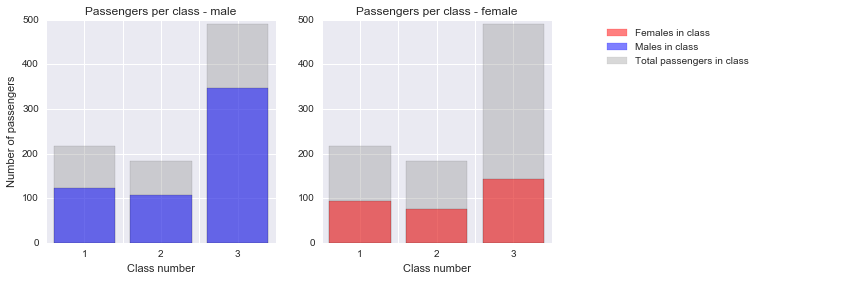

In [14]:
# distribution per classes
c = {False: 'blue', True: 'red'}
names = {False: 'male', True: 'female'}
plt.figure(figsize=(14, 4))
for v,g in mydata[['Pclass', 'IsFemale']].groupby(['IsFemale']):
    plt.subplot(1,3,1 + v)
    plt.title('Passengers per class - ' + names[v])
    for i in [1,2,3]:
        plt.bar((i), (mydata['Pclass'].isin([i]).sum()), alpha=0.3, align='center', color='grey')
        plt.bar((i), (g['Pclass'].isin([i]).sum()), alpha=0.5, align='center', color=c[v])
    
    locs, labels = plt.xticks()
    plt.xticks(locs, ('',1,'',2,'',3,''))
    plt.xlabel('Class number')

# add a single ylabel
plt.subplot(1,3,1)
plt.ylabel('Number of passengers')

# add legend
plt.subplot(1,3,3)
plt.axis('off')
l1 = mptch.Patch(color=c[True], alpha=0.5, label='Females in class')
l2 = mptch.Patch(color=c[False], alpha=0.5, label='Males in class')
l3 = mptch.Patch(color='grey', alpha=0.3, label='Total passengers in class')
bogus = plt.legend(handles=[l1, l2, l3], loc='upper left')

While for the first two classes the number of men and women are comparable, the third class is different. Significantly more men were present in this class (a ratio of almost 3:1).

In the next cell we visualize the survival rates across classes as a function of sex.

class 1 male survival rate 0.368852459016
class 1 female survival rate 0.968085106383
class 2 male survival rate 0.157407407407
class 2 female survival rate 0.921052631579
class 3 male survival rate 0.135446685879
class 3 female survival rate 0.5


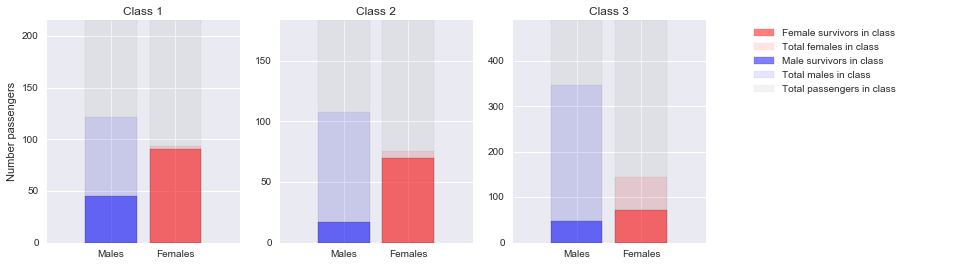

In [15]:
plt.figure(figsize=(16, 4))
c = {False: 'blue', True: 'red'}
names = {False: 'male', True: 'female'}
for vclass, g1 in mydata.groupby(['Pclass']):

    plt.subplot(140+ vclass)    
    plt.bar((1,2), (g1.shape[0], g1.shape[0]),  align='center', alpha=0.1, color='grey')
    
    for vfemale, g2 in g1.groupby(['IsFemale']):
        surv = g2['Survived'].isin([1]).sum()
        total = g2.shape[0]
        plt.bar((1 + vfemale), (surv),  align='center', alpha=0.5, color= c[vfemale])
        plt.bar((1 + vfemale), (total), align='center', alpha=0.1, color= c[vfemale])
        print 'class', vclass, names[vfemale], 'survival rate', 1.0*surv/total
    
    plt.xticks((0,1,2,3), ('', 'Males', 'Females', ''))
    plt.ylim([0, g1.shape[0]])
    plt.title('Class ' + str(vclass))
    
# add a single y label
plt.subplot(1,4,1)
plt.ylabel('Number passengers')

# show legend as a separate plot
plt.subplot(1,4,4)
plt.axis('off')
l1 = mptch.Patch(color='red', alpha=0.5, label='Female survivors in class')
l2 = mptch.Patch(color='red', alpha=0.1, label='Total females in class')
l3 = mptch.Patch(color='blue', alpha=0.5, label='Male survivors in class')
l4 = mptch.Patch(color='blue', alpha=0.1, label='Total males in class')
l5 = mptch.Patch(color='grey', alpha=0.1, label='Total passengers in class')
bogus = plt.legend(handles=[l1, l2, l3, l4, l5], loc='upper left')

These results match the intuition and the historical facts. Overall, women had priority in the life saving process and were placed on the boats. This can be seen from the high percentages in all three classes. The third class had access to fewer boats and were present in the largest number, which led to a very small survival rate. This is also reflected in the graphs above.

### Age Relationship to Survival

As the final step, I took a look at the age relationship to the survival rates. First, let's plot the age histogram for survivors and non-survivors:

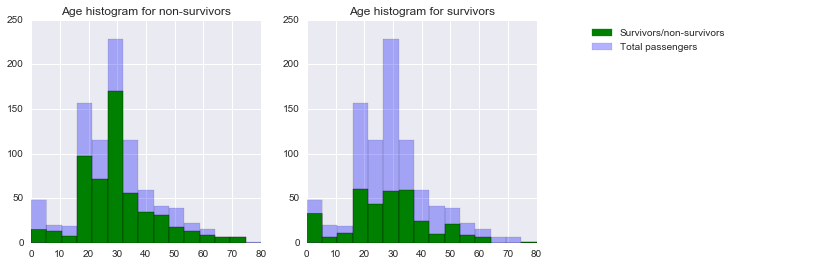

In [16]:
# create a linear bin distribution up to 80 years of age
bins = np.linspace(0, 80, 16)

# how do ages correlate with survival?
plt.figure(figsize=(14, 4))
for v,g in mydata[['Age', 'Survived', 'IsFemale']].dropna().groupby('Survived'):
    plt.subplot(1,3,1 + v)
    plt.title('Age histogram for survivors' if v else 'Age histogram for non-survivors')
    plt.hist(mydata['Age'].as_matrix(), bins, alpha=0.3, color='blue')
    plt.hist(g['Age'].as_matrix(), bins, alpha=1, color='green')
    
# show legend as a separate plot
plt.subplot(1,3,3)
plt.axis('off')
l1 = mptch.Patch(color='green', alpha=1, label='Survivors/non-survivors')
l2 = mptch.Patch(color='blue', alpha=0.3, label='Total passengers')
bogus = plt.legend(handles=[l1, l2], loc='upper left') 

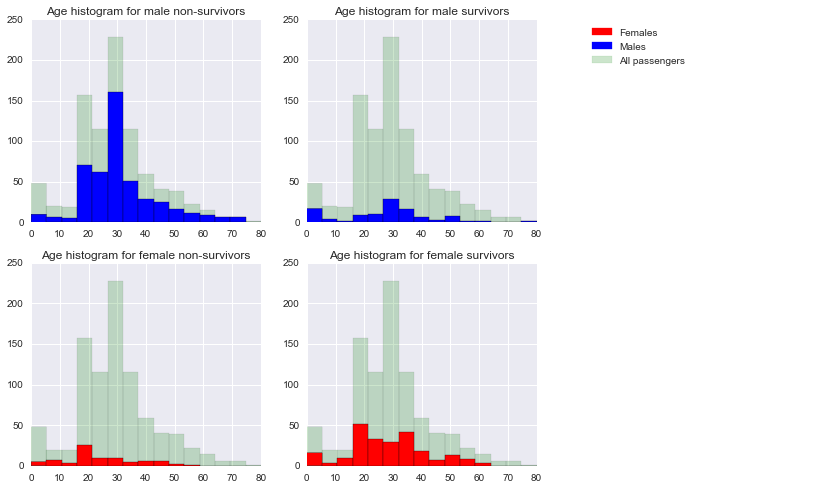

In [17]:
# how do ages correlate with survival?
plt.figure(figsize=(14, 8))
for v,g in mydata[['Age', 'Survived', 'IsFemale']].dropna().groupby(['Survived','IsFemale']):
    plt.subplot(2,3,1 + v[0] + 3*v[1])
    plt.title('Age histogram for ' + names[v[1]] + ' survivors' if v[0] else 'Age histogram for ' + 
              names[v[1]] + ' non-survivors')
    plt.hist(mydata.dropna()['Age'].as_matrix(), bins, alpha=0.2, color='green')
    plt.hist(g['Age'].as_matrix(), bins, alpha=1, color=c[v[1]])

# show legend as a separate plot
plt.subplot(1,3,3)
plt.axis('off')
l1 = mptch.Patch(color='red', alpha=1, label='Females')
l2 = mptch.Patch(color='blue', alpha=1, label='Males')
l3 = mptch.Patch(color='green', alpha=0.2, label='All passengers')
bogus = plt.legend(handles=[l1, l2, l3], loc='upper left')

These histograms fail to show a clear correlation between age and survival probability. They reiterate the previous result, where the survival rates as a function of sex was explored. 

Next we plot the survival rate per each bin (20 bins equally distributed between 0 and 80 years of age):

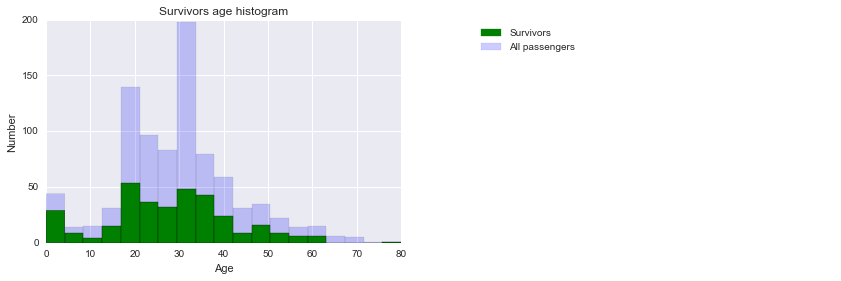

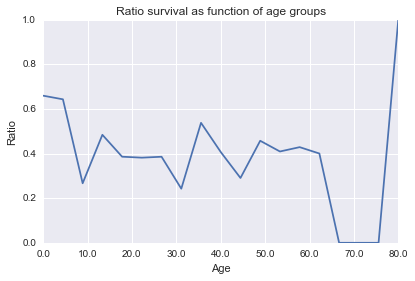

In [19]:
# histograms for all ages, histograms for survivor ages
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
bins = np.linspace(0, 80, 20)
vall = plt.hist(mydata['Age'].as_matrix(), bins, color='blue', alpha = 0.2)
vsur = plt.hist(mydata[mydata['Survived'].isin([1])]['Age'].as_matrix(), bins, color='green', alpha=1)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Survivors age histogram')

# show legend as a separate plot
plt.subplot(1,2,2)
plt.axis('off')
l1 = mptch.Patch(color='green', alpha=1, label='Survivors')
l2 = mptch.Patch(color='blue', alpha=0.2, label='All passengers')
bogus = plt.legend(handles=[l1, l2], loc='upper left')

# plot the ratio between the two groups
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.title('Ratio survival as function of age groups')
plt.plot(vsur[0] / vall[0])
plt.xlabel('Age')
plt.ylabel('Ratio')
locs, labels = plt.xticks()
newlocs = np.linspace(0, max(locs), 9)
newlabels = np.linspace(0, 80, 9)
bogus = plt.xticks(newlocs, newlabels)

These graphs also fail to convince that there is any signficant correlation between age and survival rate. While at a first glance one could assume that this certainly exist for the first and last bin, closer inspection shows this is not the case. The spike in the last bin is due to a single person (80 years of age) who was saved. If the resolution of the histogram is increased, more spikes appear in the interval 0-10 years of age, making the first observation false.

### Conclusions

In this report we have analyzed a few variables from the Titanic dataset. Data was provided in a pretty good format, only minor conversions were needed. The most notable data wrangling we performed was to replace missing age information with an estimate and remove the '0' value from the ticket prices.

We asked three questions on this data. The first one was answered positively and confirmed that there was a correlation between the titles used in the passenger descriptions and their age range. 

The second question addressed the survival rates of women with respect to men. Data shows that the survival rate of women was larger than men, in both absolute numbers and ratio. The women in the first two classes were saved in proportion of over 90%.

Last question we asked was about age influence on survival rate. I would say that the available data is inconclusive in this case. This answer takes into account that almost a quarter of age data is unavailable and we filled in an estimate. Second, the definition of age groups is subjective and leads to different results if different threshold are adopted.